Head of dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area 

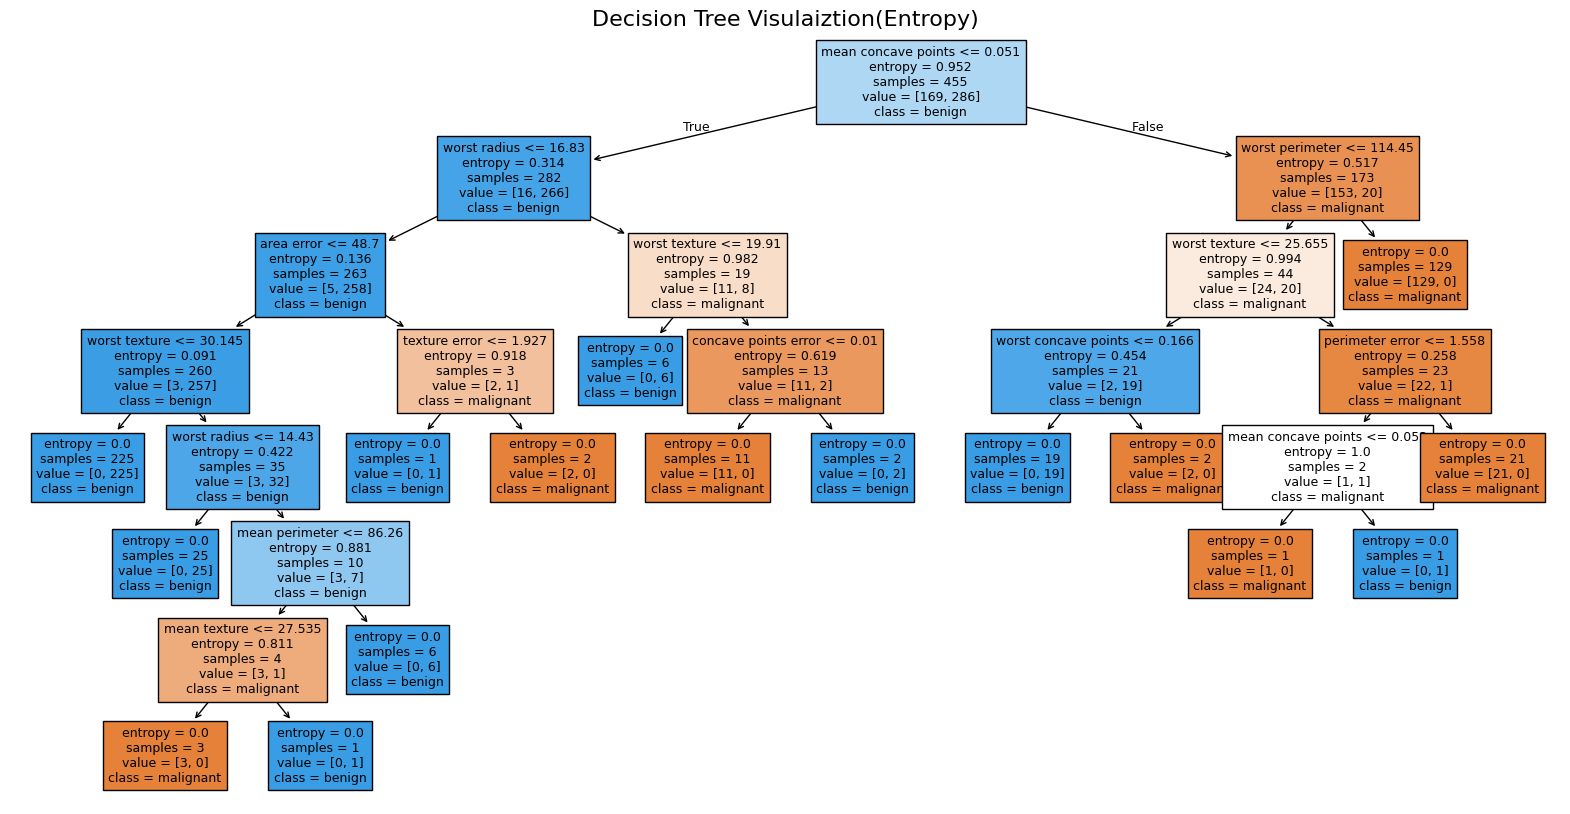

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
data=load_breast_cancer()
x=data.data
y=data.target
df=pd.DataFrame(data.data,columns=data.feature_names)
df['diagnosis']=data.target
print("Head of dataset:")
print(df.head())
print("\nHead of dataset:")
print(df.info())
print("\nDataset Shape:")
print(df.shape)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
clf=DecisionTreeClassifier(criterion='entropy',random_state=42)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("\nAccuracy:",accuracy)
print("\nClassification Report:")
print(classification_report(y_test,y_pred,target_names=data.target_names))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))
new_sample=np.array([[12.5,19.2,80.0,500.0,0.085,0.1,0.05,0.02,0.17,0.06,0.4,1.0,2.5,40.0,
0.25,0.31,0.15,0.006,0.02,0.03,16.0,25.0,105.0,900.0,0.13,0.25,0.28,0.12,0.29,0.08]])
prediction=clf.predict(new_sample)
print("\nNew sample prediction:")
print("Class:",data.target_names[prediction][0])
plt.figure(figsize=(20,10))
plot_tree(clf,filled=True,feature_names=data.feature_names,class_names=data.target_names,fontsize=9)
plt.title("Decision Tree Visulaiztion(Entropy)",fontsize=16)
plt.show()